<a href="https://colab.research.google.com/github/itinasharma/DeepLearning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
csv_path = "/content/drive/MyDrive/deep_learning_case_study_dataset/products.csv" # adjust path if in Drive
images_dir = "/content/drive/MyDrive/deep_learning_case_study_dataset/images"

In [ ]:
df = pd.read_csv(csv_path)
le = LabelEncoder()
df["label"] = le.fit_transform(df["name"])

print(df.head())
print("Categories:", dict(zip(le.classes_, range(len(le.classes_)))))

  product_id     category              name  \
0       P001     Clothing       Red T-Shirt   
1       P002  Electronics  Wireless Earbuds   
2       P003    Furniture      Office Chair   
3       P004     Clothing        Blue Jeans   
4       P005  Electronics        Smartphone   

                          description            image_path  label  
0          Comfortable cotton T-shirt  images/product_1.jpg     12  
1  Bluetooth noise-cancelling earbuds  images/product_2.jpg     19  
2          Ergonomic adjustable chair  images/product_3.jpg     11  
3                 Slim fit blue jeans  images/product_4.jpg      0  
4           Latest Android smartphone  images/product_5.jpg     14  
Categories: {'Blue Jeans': 0, 'Bookshelf': 1, 'Camera': 2, 'Cap': 3, 'Dining Table': 4, 'Dress': 5, 'Headphones': 6, 'Hoodie': 7, 'Jacket': 8, 'Laptop': 9, 'Monitor': 10, 'Office Chair': 11, 'Red T-Shirt': 12, 'Shoes': 13, 'Smartphone': 14, 'Smartwatch': 15, 'Sneakers': 16, 'Sofa': 17, 'Tablet': 18, 'W

In [ ]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3

X, Y = [], []

for row in df.itertuples():
    img_path = os.path.join(images_dir, os.path.basename(row.image_path))
    img = cv2.imread(img_path)

    if img is None:
        print("Missing:", img_path)
        continue

    # Resize & store
    resized_img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
    X.append(resized_img)
    Y.append(row.label)

Missing: /content/drive/MyDrive/deep_learning_case_study_dataset/images/product_14.jpg


In [ ]:
# Convert to numpy arrays
X = np.array(X, dtype="float32") / 255.0  # normalize
Y = np.array(Y)

print("X shape:", X.shape)  # (num_samples, 128, 128, 3)
print("Y shape:", Y.shape)  # (num_samples,)

X shape: (19, 128, 128, 3)
Y shape: (19,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42 )

In [ ]:
num_classes = len(le.classes_)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)

print("Train samples:", X_train.shape[0], "Val samples:", X_val.shape[0])

Train samples: 15 Val samples: 4


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,220 (12.62 MB)

 Trainable params: 3,307,220 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Predictions
y_pred = model.predict(X_val).argmax(axis=1)
y_true = y_val.argmax(axis=1)
print(classification_report(y_true, y_pred, target_names=le.classes_, labels=np.unique(y_true)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
                  precision    recall  f1-score   support

      Blue Jeans       0.00      0.00      0.00       1.0
       Bookshelf       0.00      0.00      0.00       1.0
          Camera       0.00      0.00      0.00       1.0
             Cap       0.00      0.00      0.00       1.0

       micro avg       0.00      0.00      0.00       4.0
       macro avg       0.00      0.00      0.00       4.0
    weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 4, does not match size of target_names, 20
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

In [ ]:
model.save("cnn_product_model.keras")
print("Model saved as cnn_product_model.keras")

Model saved as cnn_product_model.keras


Using test image: /content/drive/MyDrive/deep_learning_case_study_dataset/images/product_5.jpg


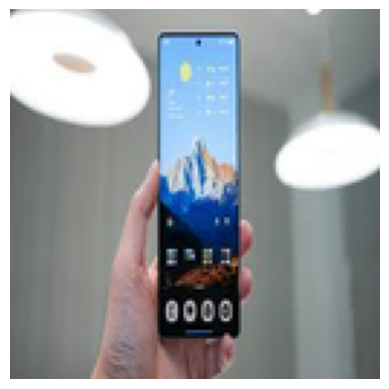

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Raw prediction probabilities: [[3.4836046e-03 1.9256631e-02 3.3334598e-03 7.6894416e-03 7.1449419e-03
  1.1640806e-03 4.2583323e-03 5.4247979e-05 4.1954285e-03 1.3224146e-03
  3.2008735e-03 6.6643864e-02 4.9034698e-04 3.4803241e-03 8.7159050e-01
  1.4987813e-05 4.5399927e-04 8.1252778e-04 1.3725164e-03 3.7472841e-05]]
Predicted class index: 14
Predicted class name: Smartphone


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# classes from LabelEncoder
classes = list(le.classes_)   # e.g. ["Clothing", "Electronics", "Furniture"]

# base folder where images are stored
base_dir = "/content/drive/MyDrive/deep_learning_case_study_dataset"

# pick a row from the dataframe (e.g., product_5 is row index 4)
row = df.iloc[4]   # Smartphone
test_image_path = os.path.join(base_dir, row["image_path"])
print("Using test image:", test_image_path)

# load and preprocess
fileImage = Image.open(test_image_path).convert("RGB").resize([IMAGE_WIDTH, IMAGE_HEIGHT], Image.LANCZOS)
image = np.array(fileImage) / 255.0
myimage = image.reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, 3)

# show the image
plt.imshow(image)
plt.axis("off")
plt.show()

# predict
my_predicted_image = model.predict(myimage)
print("Raw prediction probabilities:", my_predicted_image)

y_class = np.argmax(my_predicted_image)
print("Predicted class index:", y_class)
print("Predicted class name:", classes[y_class])